In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [2]:
backtest_data = {}
results_dir = "."

# Load all backtest CSVs
for file in os.listdir(results_dir):
    if file.startswith("backtest_") and file.endswith(".csv"):
        ticker = file.replace("backtest_", "").replace(".csv", "")
        df = pd.read_csv(os.path.join(results_dir, file))
        backtest_data[ticker] = df

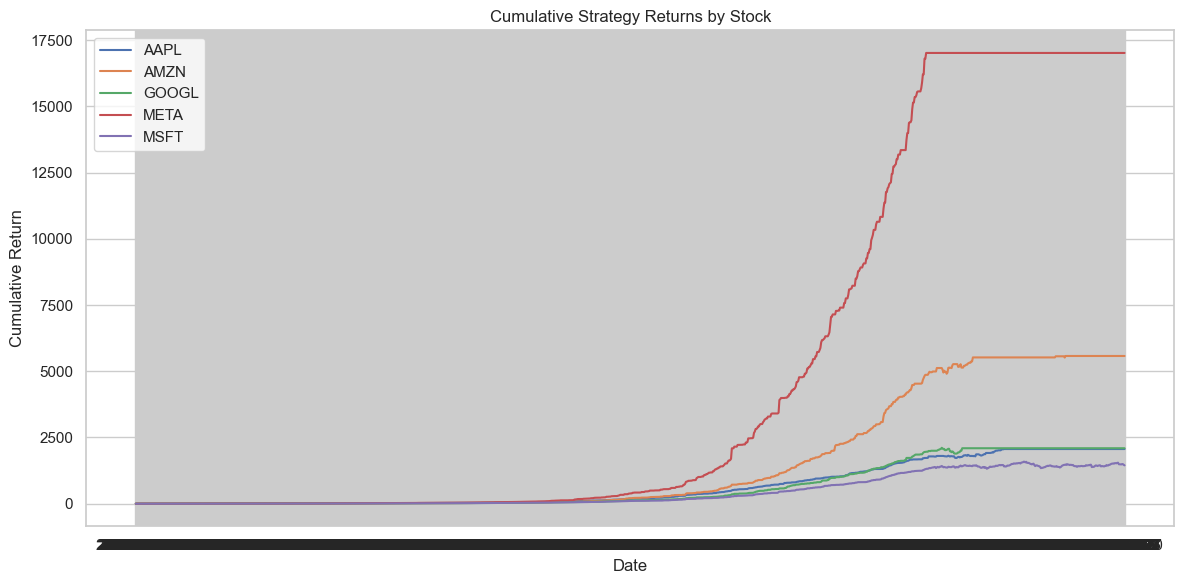

In [3]:
plt.figure(figsize=(12, 6))
for ticker, df in backtest_data.items():
    plt.plot(df["Date"], df["Cumulative_Return"], label=ticker)

plt.title("Cumulative Strategy Returns by Stock")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\aspav\AppData\Local\Temp\ipykernel_19392\3339236500.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_probs.keys()), y=list(sorted_probs.values()), palette="viridis")


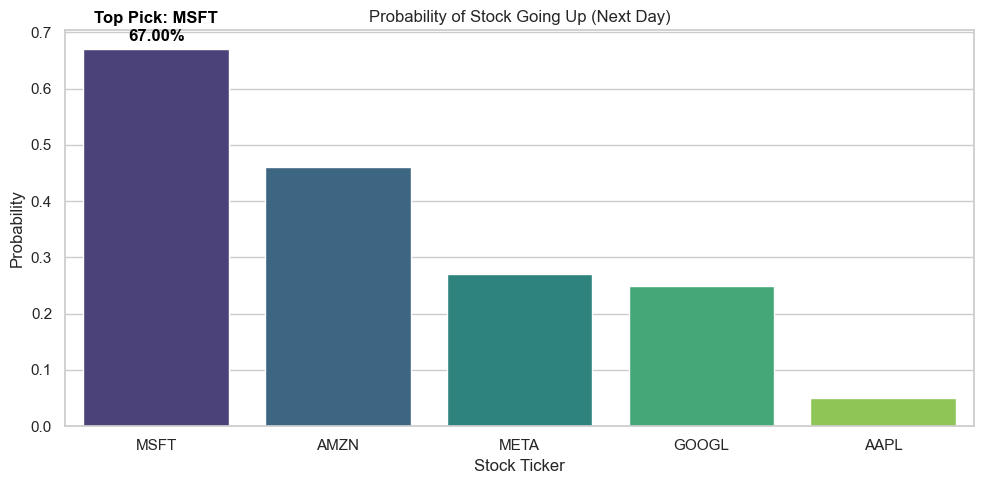

In [4]:
latest_probs = {
    ticker: df["Prob_Up"].iloc[-1]
    for ticker, df in backtest_data.items()
}

sorted_probs = dict(sorted(latest_probs.items(), key=lambda x: x[1], reverse=True))
top_ticker, top_prob = next(iter(sorted_probs.items()))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_probs.keys()), y=list(sorted_probs.values()), palette="viridis")
plt.title("Probability of Stock Going Up (Next Day)")
plt.ylabel("Probability")
plt.xlabel("Stock Ticker")

# Annotate top pick
plt.text(top_ticker, top_prob + 0.01, f"Top Pick: {top_ticker}\n{top_prob:.2%}",
         ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [5]:
print(f"📌 Best stock to invest in based on model: {top_ticker} ({top_prob:.2%} probability of increase)")

📌 Best stock to invest in based on model: MSFT (67.00% probability of increase)
